### Decomposition of surface enthalpy fluxes

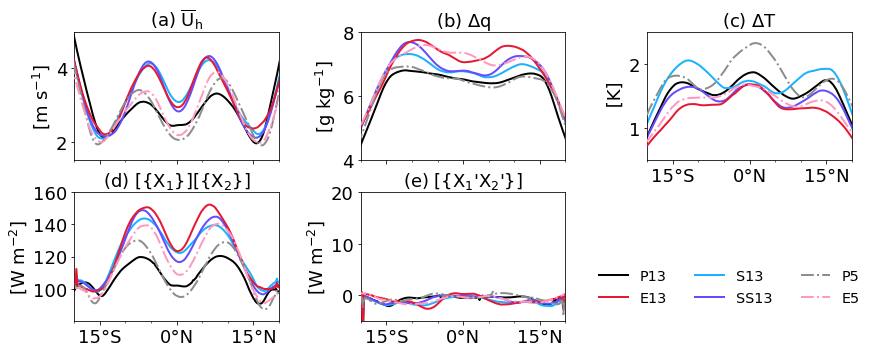

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import sys
sys.path.append('../../scripts/')
from constant import cp, Lv
%matplotlib inline

flists=['param','explicit', 'shallow', 'stochastic_shallow','P5','E5']
labels=['P13','E13','S13', 'SS13','P5','E5']
colors = ['black','#E51932','#1AB2FF','#654CFF','#8D8D8D','#FF99BF']
zo=[0,3,1,2,4,5]
ls = list(['solid'])*4 + list(['dashdot'])*2

titles=['(a) $\overline{\mathrm{U}}_\mathrm{h}$','(b) $\Delta$q','(c) $\Delta$T',
       '(d) [{X$_1$}][{X$_2$}]', '(e) [{X$_1$\'X$_2$\'}]', '(f) [{X$_1$}$^*${X$_2$}$^*$]']

fig, axs = plt.subplots(2,3, figsize=(12,5.5))
fig.subplots_adjust(wspace=0.4, hspace=0.25, bottom=0.15,left=0.08,right=0.98)

fs=18
plt.rcParams.update({'font.size': fs})

for i, od in enumerate(flists):
    ds = xr.open_dataset('data/%s/flx_vars_timeavg.nc' % od)
    #ds = xr.open_dataset('data/%s/new_lh_longtimeavg.nc' % od)
    #print(ds)
    axs[0,0].plot(ds.lat, ds.usfc.mean(['time','lon']), color = colors[i],
                  lw=2, zorder=zo[i], ls=ls[i])
    axs[0,1].plot(ds.lat, -ds.dqv.mean(['time','lon']).values * 1000, color = colors[i],
                  lw=2, zorder=zo[i], ls=ls[i])
    axs[0,2].plot(ds.lat, -ds.dtemp.mean(['time','lon']), color = colors[i],
                  lw=2, zorder=zo[i], ls=ls[i])
    
    ds = xr.open_dataset('data/%s/decompose_timeavg.nc' % od)
    axs[1,0].plot(ds.lat, ds.term1, color = colors[i], lw=2,
                  zorder=zo[i], ls=ls[i])
    axs[1,1].plot(ds.lat, ds.term3, color = colors[i], lw=2,
                  label=labels[i], zorder=zo[i], ls=ls[i])
    axs[1,2].plot(ds.lat, ds.term2, color = colors[i], lw=2,
                  label=labels[i], zorder=zo[i], ls=ls[i])

axs[1,0].set_ylim(80,160)
axs[1,1].set_ylim(-5,20)
axs[1,2].set_ylim(-5,20)

axs[1,0].set_ylabel('[W m$^{-2}$]', fontsize=fs)
axs[1,0].set_yticks([100, 120, 140, 160])
axs[1,1].set_ylabel('[W m$^{-2}$]', fontsize=fs)
axs[0,0].set_ylim(1.5,5)

axs[0,1].set_ylim(4,8)
axs[0,2].set_ylim(0.5,2.5)
axs[1,1].legend(loc='upper right', bbox_to_anchor=(2.5,0.5),
                fontsize=fs*0.8, frameon=False, ncol=3)

xthicks = ['15\xb0S','0\xb0N','15\xb0N']
for i, ax in enumerate(axs.flat):
    ax.set_xlim(-20,20)
    ax.set_title(titles[i], fontsize=fs)
    ax.tick_params(axis='x', labelsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.set_xticks([-15,0,15])
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    
ylabels=['[m s'+r'$^{-1}$'+']','[g kg'+r'$^{-1}$'+']', ' [K]']    
for i in range(3):
    axs[0,i].set_ylabel(ylabels[i], fontsize=fs)
    axs[0,i].set_xticklabels([' ', ' ', ' '])
    axs[1,i].set_xticklabels(xthicks, fontsize=fs)

axs[0,2].set_xticklabels(xthicks, fontsize=fs)

axs[1,2].set_visible(False)
plt.savefig('../fig/flx_diagnostics.png', dpi=150)

### two-dimensional histograms

param - max freq - 15.033
SEF: 101.7
shallow - max freq - 10.209
SEF: 121.5
P5 - max freq - 12.523
SEF: 102.5
explicit - max freq - 5.982
SEF: 130.0
stochastic_shallow - max freq - 8.805
SEF: 124.1
E5 - max freq - 8.766
SEF: 117.3


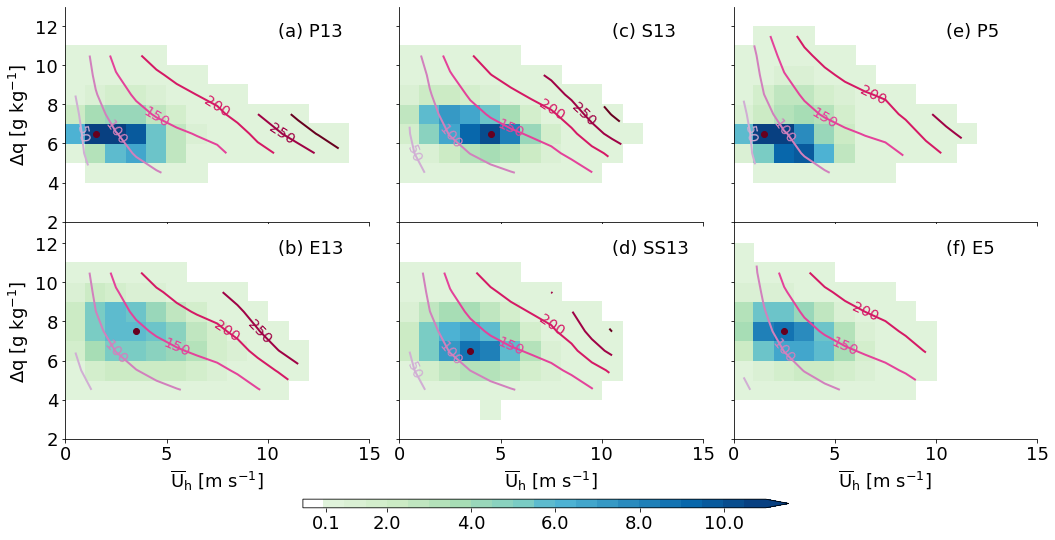

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from matplotlib import cm
from matplotlib.colors import ListedColormap

fs=18
plt.rcParams.update({'font.size': fs})

viridis = cm.get_cmap('PuRd', 256)
newcolors = viridis(np.linspace(0,1,22))
newcolors = newcolors[6:,:]
newcolors = newcolors[::3]

viridis_cmap = cm.get_cmap('GnBu', 256)
newcolors_cmap = viridis_cmap(np.linspace(0,1,25))
#newcolors_cmap = newcolors_cmap[8:-8,:]
newcolors_cmap = newcolors_cmap[3:,:]
mincolor = np.array([256/256, 256/256, 256/256, 1])
#newcolors_cmap[:1,:] = mincolor
newcmp = ListedColormap(newcolors_cmap)
#newcolors = newcolors[::3]

flists = ['param','shallow','P5','explicit','stochastic_shallow','E5']
titles = ['(a) P13', '(c) S13', '(e) P5',
          '(b) E13','(d) SS13', '(f) E5']
fig, axs = plt.subplots(2,3, figsize=(15,8), sharex = True )
fig.subplots_adjust(wspace=0.1, hspace=0.01, bottom=0.2,left=0.08,right=0.98,top=0.95)

axs=axs.flat

manual_locs=[[[3,10],[4,8.7],[3,7.7],[3,5.5]],
            [[3,4],[4,5],[4,8],[2,6.5]],
            [[3,3.5],[5,5],[3,8.5],[5,6]],
            False] 
#set nan 
for i, od in enumerate(flists):
    ds=xr.open_dataset('data/%s/DeMott_10NS.nc' % od)
    freq_density = ds.freq_arr/np.nansum(ds.freq_arr)*100.
    
    ind_max = np.argwhere(freq_density.values == freq_density.max().values)
    
    freq_density = freq_density.where(freq_density > 0.001, np.nan)
    ds['var_arr'] = ds['var_arr'].where(freq_density > 0.001, np.nan)
    
    im=axs[i].pcolor(ds.x, ds.y, freq_density, cmap=newcmp, vmin=0, vmax=11,shading='nearest')
    print('%s - max freq - %.3f' % (od, freq_density.max()))
    #axs[i].pcolor(ds.x, ds.y, -1*(ds.var_arr.where(ds.var_arr < -300.)), cmap='RdBu', vmin=400, vmax=550,shading='nearest')

    cs=axs[i].contour(ds.x, ds.y, ds.var_arr, levels=[50, 100, 150, 200, 250, 300, 350],
                      colors=newcolors, linewidths=2)
    
    axs[i].clabel(cs, inline=False, fontsize=fs*0.8, fmt='%d')#,  manual=manual_locs[i])
    axs[i].text(10.5,11.5, titles[i], ha='left')
    axs[i].plot(ds.y[ind_max[0][1]], ds.x[ind_max[0][0]], 'o', color=newcolors[-1,:])

    #print('SEF: %.1f' % ds.var_arr[ind_max[0][0],ind_max[0][1]].values)
    ds_cal = ds.where(ds.freq_arr > 0.1, drop=True)
    mean = ds_cal.freq_arr*ds_cal.var_arr / np.nansum(ds_cal.freq_arr)
    print('SEF: %.1f' % mean.sum(skipna=True).values)
    
newcolors_cmap = viridis_cmap(np.linspace(0,1,25))
newcolors_cmap = newcolors_cmap[2:,:]
mincolor = np.array([256/256, 256/256, 256/256, 1])
newcolors_cmap[:1,:] = mincolor
newcmp_colorbar = ListedColormap(newcolors_cmap)

clev = np.zeros(23)
clev[2:] = np.linspace(1,11,21)
clev[1] = 0.001
im_bar = axs[0].contourf(-ds.x, -ds.y, freq_density, levels=clev, cmap = newcmp_colorbar, extend='max')

cbaxes = fig.add_axes([0.3, 0.08, 0.45, 0.015])
cb=fig.colorbar(im_bar,cax = cbaxes, ticks=[0.1,2,4,6,8,10], orientation='horizontal')

for ax in axs:
    ax.set_xlim(0,15)
    ax.set_ylim(2,13)
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticks(np.arange(2,13,2))

axs[-1].set_xlabel('$\overline{\mathrm{U}}_\mathrm{h}$ [m s$^{-1}$]')
axs[-2].set_xlabel('$\overline{\mathrm{U}}_\mathrm{h}$ [m s$^{-1}$]')
axs[-3].set_xlabel('$\overline{\mathrm{U}}_\mathrm{h}$ [m s$^{-1}$]')
axs[0].set_ylabel('$\Delta$q [g kg$^{-1}$]')
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])
axs[3].set_ylabel('$\Delta$q [g kg$^{-1}$]')
axs[4].set_yticklabels([])
axs[5].set_yticklabels([])

plt.savefig('../fig/DeMott.png', dpi=150)